## Linear Regression: Making Money from Predictions

In the previous lessons, you have studied the basic techniques for loading and manipulating data using the R language. We now turn our attention to the key question: how can we make money using this data? In this lesson, we will focus on leveraging our data to make useful *predictions* about future events; we can then use these predictions to create value for our business.

## An Example Problem: Should I Order More Ice Cream?

Suppose that you are managing an ice cream store. During the summer months, your sales are highly correlated with temperature; you sell more ice cream on very hot days than on cooler days. Your job is to balance the following concerns:

* You need to have enough ice cream in stock to avoid selling out during periods of high demand - this would cause lost revenue and angry customers.
* However, you also need to avoid holding an excessive amount of ice cream in your inventory, as this leads to additional costs and ties up your capital. 

The best way to balance these concerns is to create a predictive model that can accurately forecast future sales - that way, you can purchase additional ice cream from your suppliers only when you actually need it to fill orders. In this lesson, we will demonstrate how to use *linear regression*, perhaps the most fundamental type of predictive model, to make accurate predictions of future sales. 

## Our Data: Ice Cream Sales vs. Temperature

Before building our predictive model, we must ask - what information exists that, if we had it, would give us a hint as to whether our sales would move up or down? In the case of ice cream sales, an obvious answer is temperature data. If we know that the next week is going to be very hot, we should probably order more ice cream beforehand in anticipation of strong demand.
With this in mind, suppose that we have gathered the following data on the relationship between the high temperature on a given day and daily ice cream sales:

In [1]:
temp.df <- read.csv("data/ice-cream-sales.csv")
head(temp.df)

DailyHighTemperatureC,DailySalesContainers
<int>,<int>
21,19
22,10
23,24
24,57
26,49
26,77


Having obtained this new data, the first thing we should do is graph it to see if there are any interesting patterns:

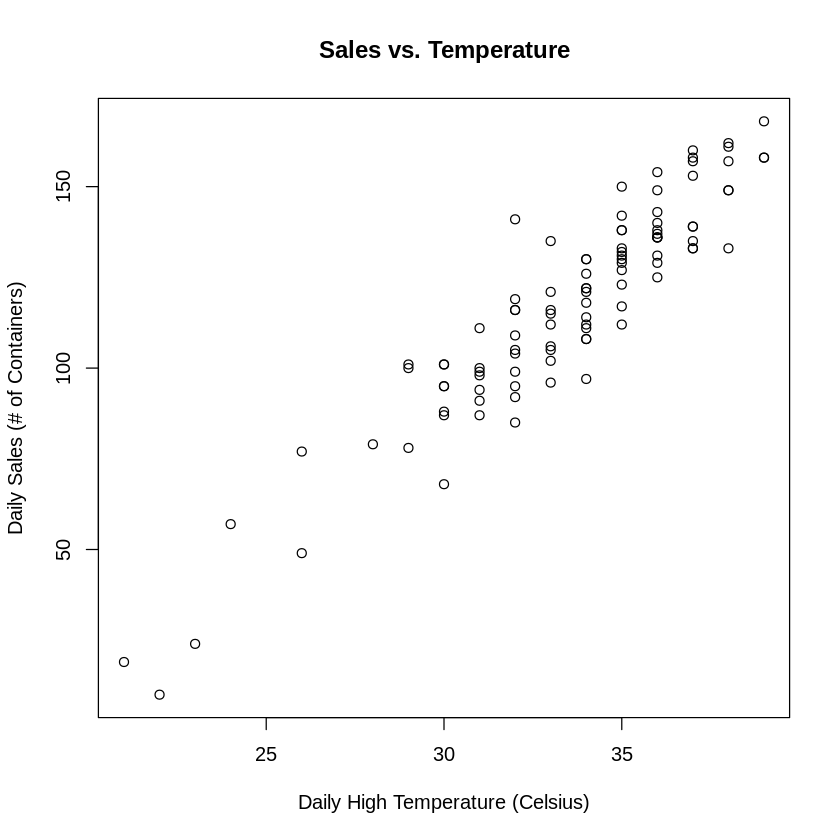

In [2]:
plot(
    DailySalesContainers ~ DailyHighTemperatureC,
    data=temp.df,
    xlab="Daily High Temperature (Celsius)",
    ylab="Daily Sales (# of Containers)",
    main="Sales vs. Temperature"
)
p <- recordPlot()

The graph above tells us several interesting facts:

* There are many more hot days than cooler days, so this dataset is most likely collected during the summer in a hot location.
* The relationship between sales and temperature appears to be roughly linear, so fitting a line to this data should be straightforward.

## Turning Data into Accurate Predictions

Suppose that your boss asks you to solve the following immediate problem: "We have `150` containers of ice cream in our inventory as of today, just before opening for business. Today's high temperature is predicted to be `32` degrees Celsius - is there a risk that we will run out of ice cream by the end of the day?" 

How would you use the data above to answer this question? A reasonable approach would be to draw a line through our scatter plot and locate the point on this line corresponding to `32` degrees celsius. We can find and draw such a line using the code below:

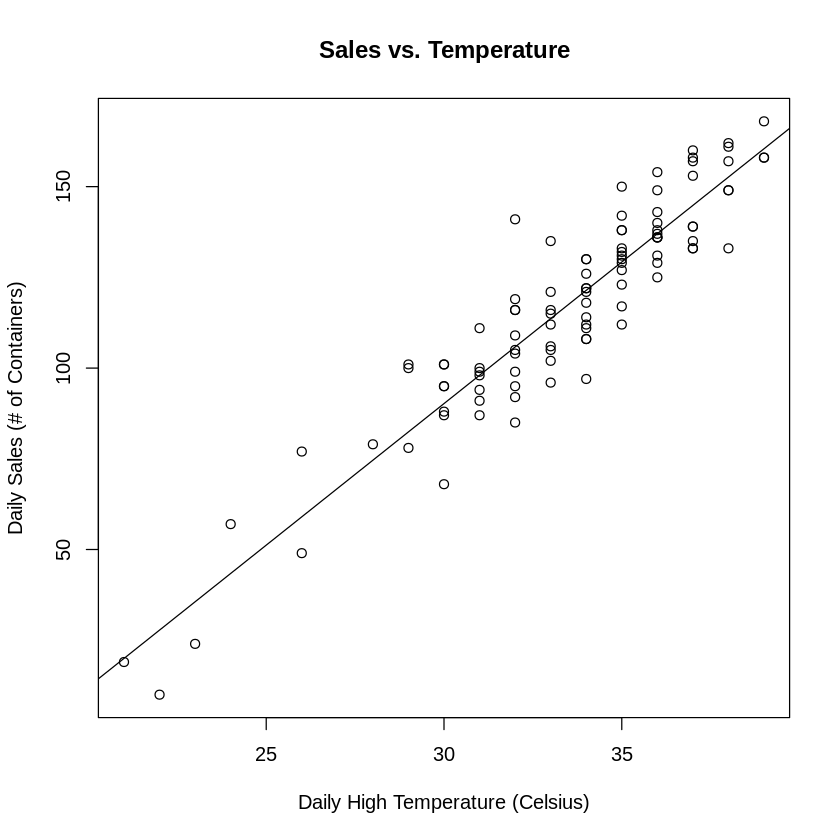

In [3]:
model <- lm(DailySalesContainers ~ DailyHighTemperatureC, data=temp.df)
replayPlot(p)
abline(model)

This line represents our "best guess" of the sales at each temperature value. We have found the "best fit" line using the `lm` function and drawn it with the `abline` function. For now, we will just assume that R has picked the line that will give us the most accurate predictions, rather than digging into the math that R uses to find the best line.

 We want to locate the point on our line corresponding to today's high temperature of `32` degrees celsius. We can obtain this point using the `predict` function, as shown below:

In [4]:
today <- data.frame("DailyHighTemperatureC"=32)
y.pred <- predict(model, newdata=today)

The value `y.pred` is just a single number - it is our best guess for the amount of ice cream that we will sell today, approximately `106` containers:

In [5]:
y.pred

1 
105.8261

We can visualize our prediction process as follows by representing our predicted sales as the blue point on the graph below:

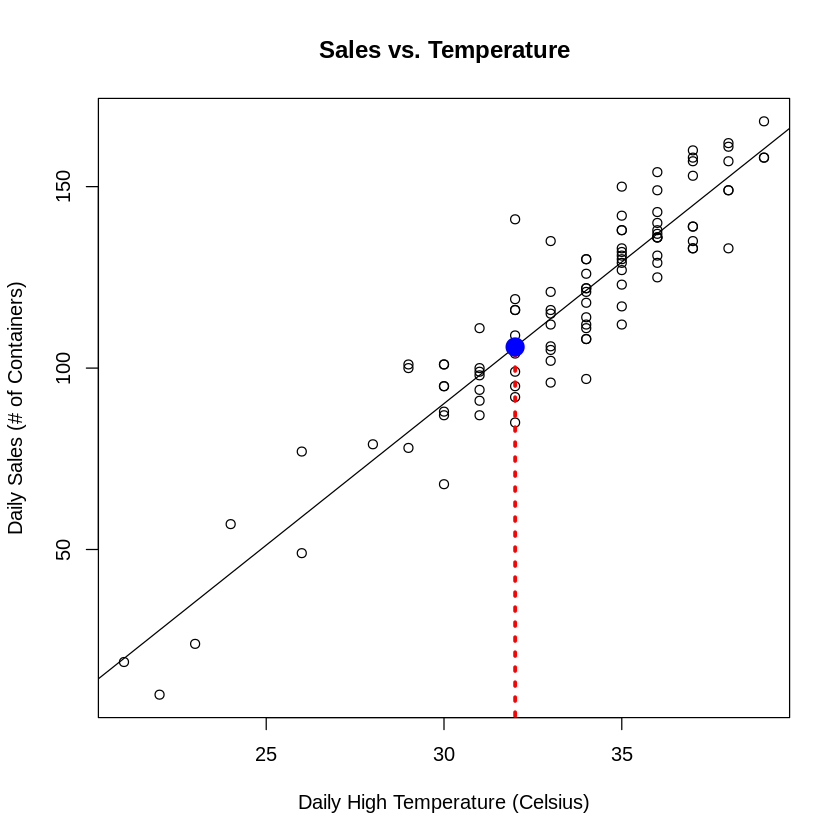

In [6]:
replayPlot(p)
abline(model)
segments(today$DailyHighTemperatureC, 0, today$DailyHighTemperatureC, y.pred, col="red", lty=3, lwd=3)
points(today$DailyHighTemperature, y.pred, col="blue", pch=19, cex=2)

If we draw our current inventory level as a green point on the graph above, we can see that our predicted sales are not nearly enough to make our store run out of ice cream:

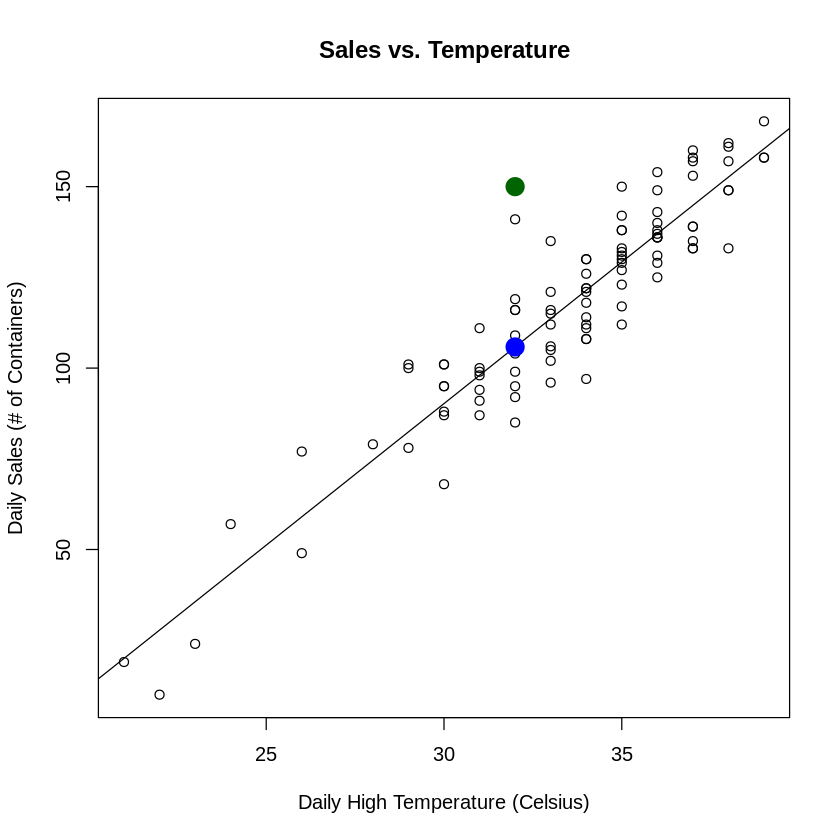

In [7]:
inventory <- 150
replayPlot(p)
abline(model)
points(today$DailyHighTemperatureC, y.pred, col="blue", pch=19, cex=2)
points(today$DailyHighTemperatureC, inventory, col="darkgreen", pch=19, cex=2)

However, our work is not yet complete. If our boss is smart, they will ask us "But how sure are you about this prediction?" This is a reasonable question - we can see that on some days with the specified temperature, we have sold almost `150` containers, so it seems that there must be at least some risk that we will sell out. But is this risk worth worrying about? 

To assess the risk that we will sell out, we can compute a *prediction interval* as follows:

In [8]:
interval <- predict(model, newdata=today, interval="prediction", level=0.95)

This prediction interval consists of three numbers - a *prediction* value (`fit`), a *lower bound* (`lwr`) and an *upper bound* (`upr`):

In [9]:
interval

fit,lwr,upr
105.8261,84.18368,127.4684


You can see that the `fit` value given above is the model's prediction, just as we saw before. The other two values, `lwr` and `upr` are explained as follows: since we specified `level=0.95`, this result is telling us that our model predicts that there is `95%` chance that today's sales will lie between `lwr` and `upr`. Let's visualize this result graphically:

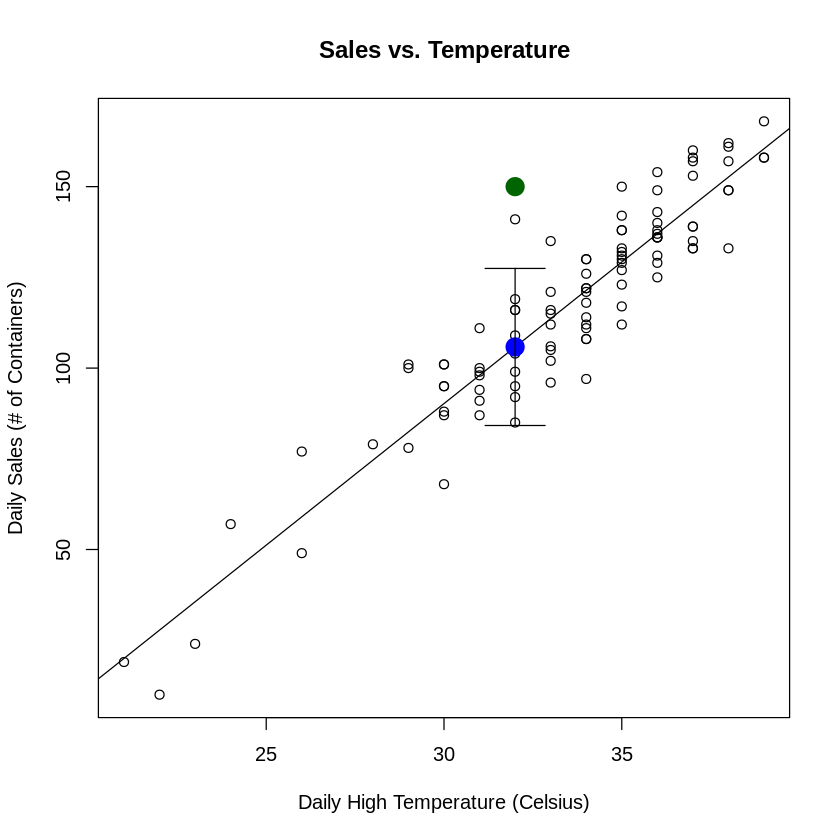

In [10]:
replayPlot(p)
abline(model)
points(today$DailyHighTemperatureC, y.pred, col="blue", pch=19, cex=2)
points(today$DailyHighTemperatureC, inventory, col="darkgreen", pch=19, cex=2)
arrows(today$DailyHighTemperatureC,interval[1,'upr'], today$DailyHighTemperature, interval[,'lwr'], angle=90, code=3)

Finally, we are at the end of this analysis. You can give your boss the following answer: "Based on our best estimate, there is a less than 5% chance that we will run out of ice cream. We do not need to rush an order for more."

<span style="color:blue;font-weight:bold">Exercise</span>: Suppose that instead of being `32` degrees Celsius, the forecasted high temperature today is `35` degrees Celsius.
Perform the following actions:

* Create a new variable called `today.revised` that contains the value `data.frame("DailyHighTemperatureC"=35)`
* Call `predict` using your model and `today.revised` to compute prediction intervals. This time, to be extra sure, pass the argument `level=0.99` to `predict` in order to obtain the prediciton interval at the 99% confidence level. Store this result in the variable `interval.99`
* Then, graph this interval as we did above using the `arrows` function. Based on this graph, do you need to order more ice cream in order to meet today's demand?

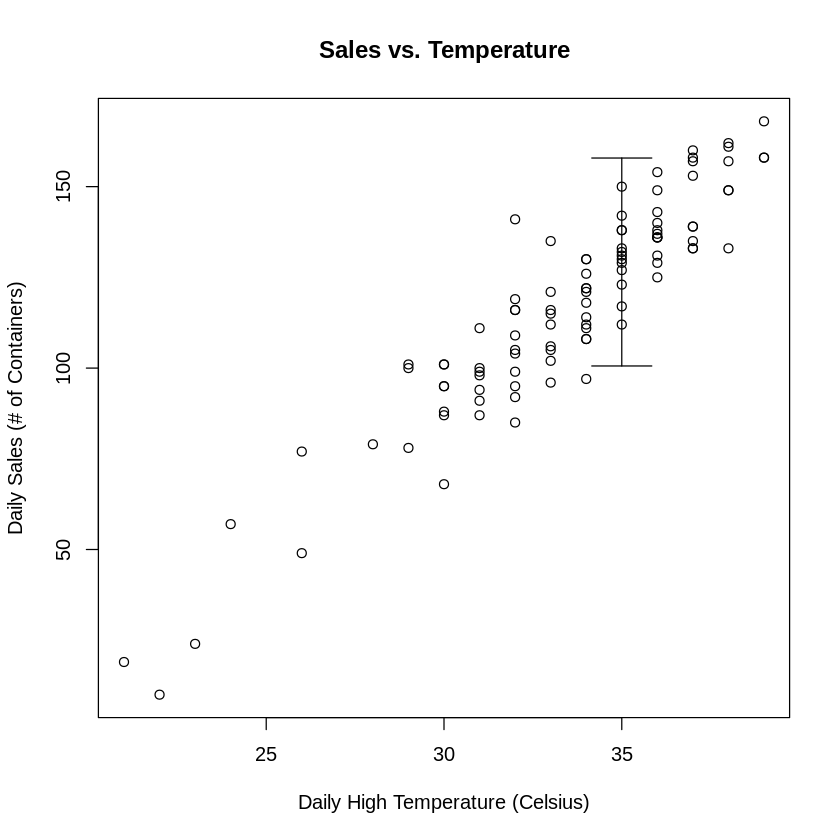

In [24]:
# delete this entire line and replace it with your code

today.revised <- data.frame("DailyHighTemperatureC"=35)
interval.99 <- predict(model, today.revised, level=0.99, interval="prediction")

replayPlot(p)
arrows(today.revised$DailyHighTemperatureC, interval.99[1,"upr"], 
       today.revised$DailyHighTemperature, interval.99[, 'lwr'],
       angle=90, code=3 
      )

In [25]:
args <- get.args.for.call("arrows", -1)
correct.interval.99 <- predict(model, newdata=today.revised, interval="prediction", level=0.99)
assert.true(all(interval.99 == correct.interval.99), 'Did you set <code>interval.99</code> correctly using the `predict` function?')
assert.true(args[[1]] == 'today.revised$DailyHighTemperatureC', 'Did you call <code>arrows</code> with <code>today.revised$DailyHighTemperatureC</code> as the first argument?')
assert.true(args[[2]] == 'interval.99[1, "upr"]', 'Did you call <code>arrows</code> with <code>interval.99[1, "upr"]</code> as the second argument?')
assert.true(args[[3]] == 'today.revised$DailyHighTemperature', 'Did you call <code>arrows</code> with <code>today.revised$DailyHighTemperature</code> as the third argument?')
assert.true(args[[4]] == 'interval.99[, "lwr"]', 'Did you call <code>arrows</code> with <code>interval.99[, "lwr"]</code> as the fourth argument?')
assert.true(args[[5]] == '90', 'Did you call <code>arrows</code> with <code>90</code> as the fifth argument?')
assert.true(args[[6]] == '3', 'Did you call <code>arrows</code> with <code>3</code> as the sixth argument?')
success()

Correct!